## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Hopfield Network with Gardner algorithm (which is Perceptron) on Random Patterns

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from tqdm import tqdm
import matplotlib.animation as animation
import sklearn.cluster
import pickle
import os.path

In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [26]:
centers = np.random.randint(low=-10, high =2, size=[60,784])
centers = np.sign(centers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


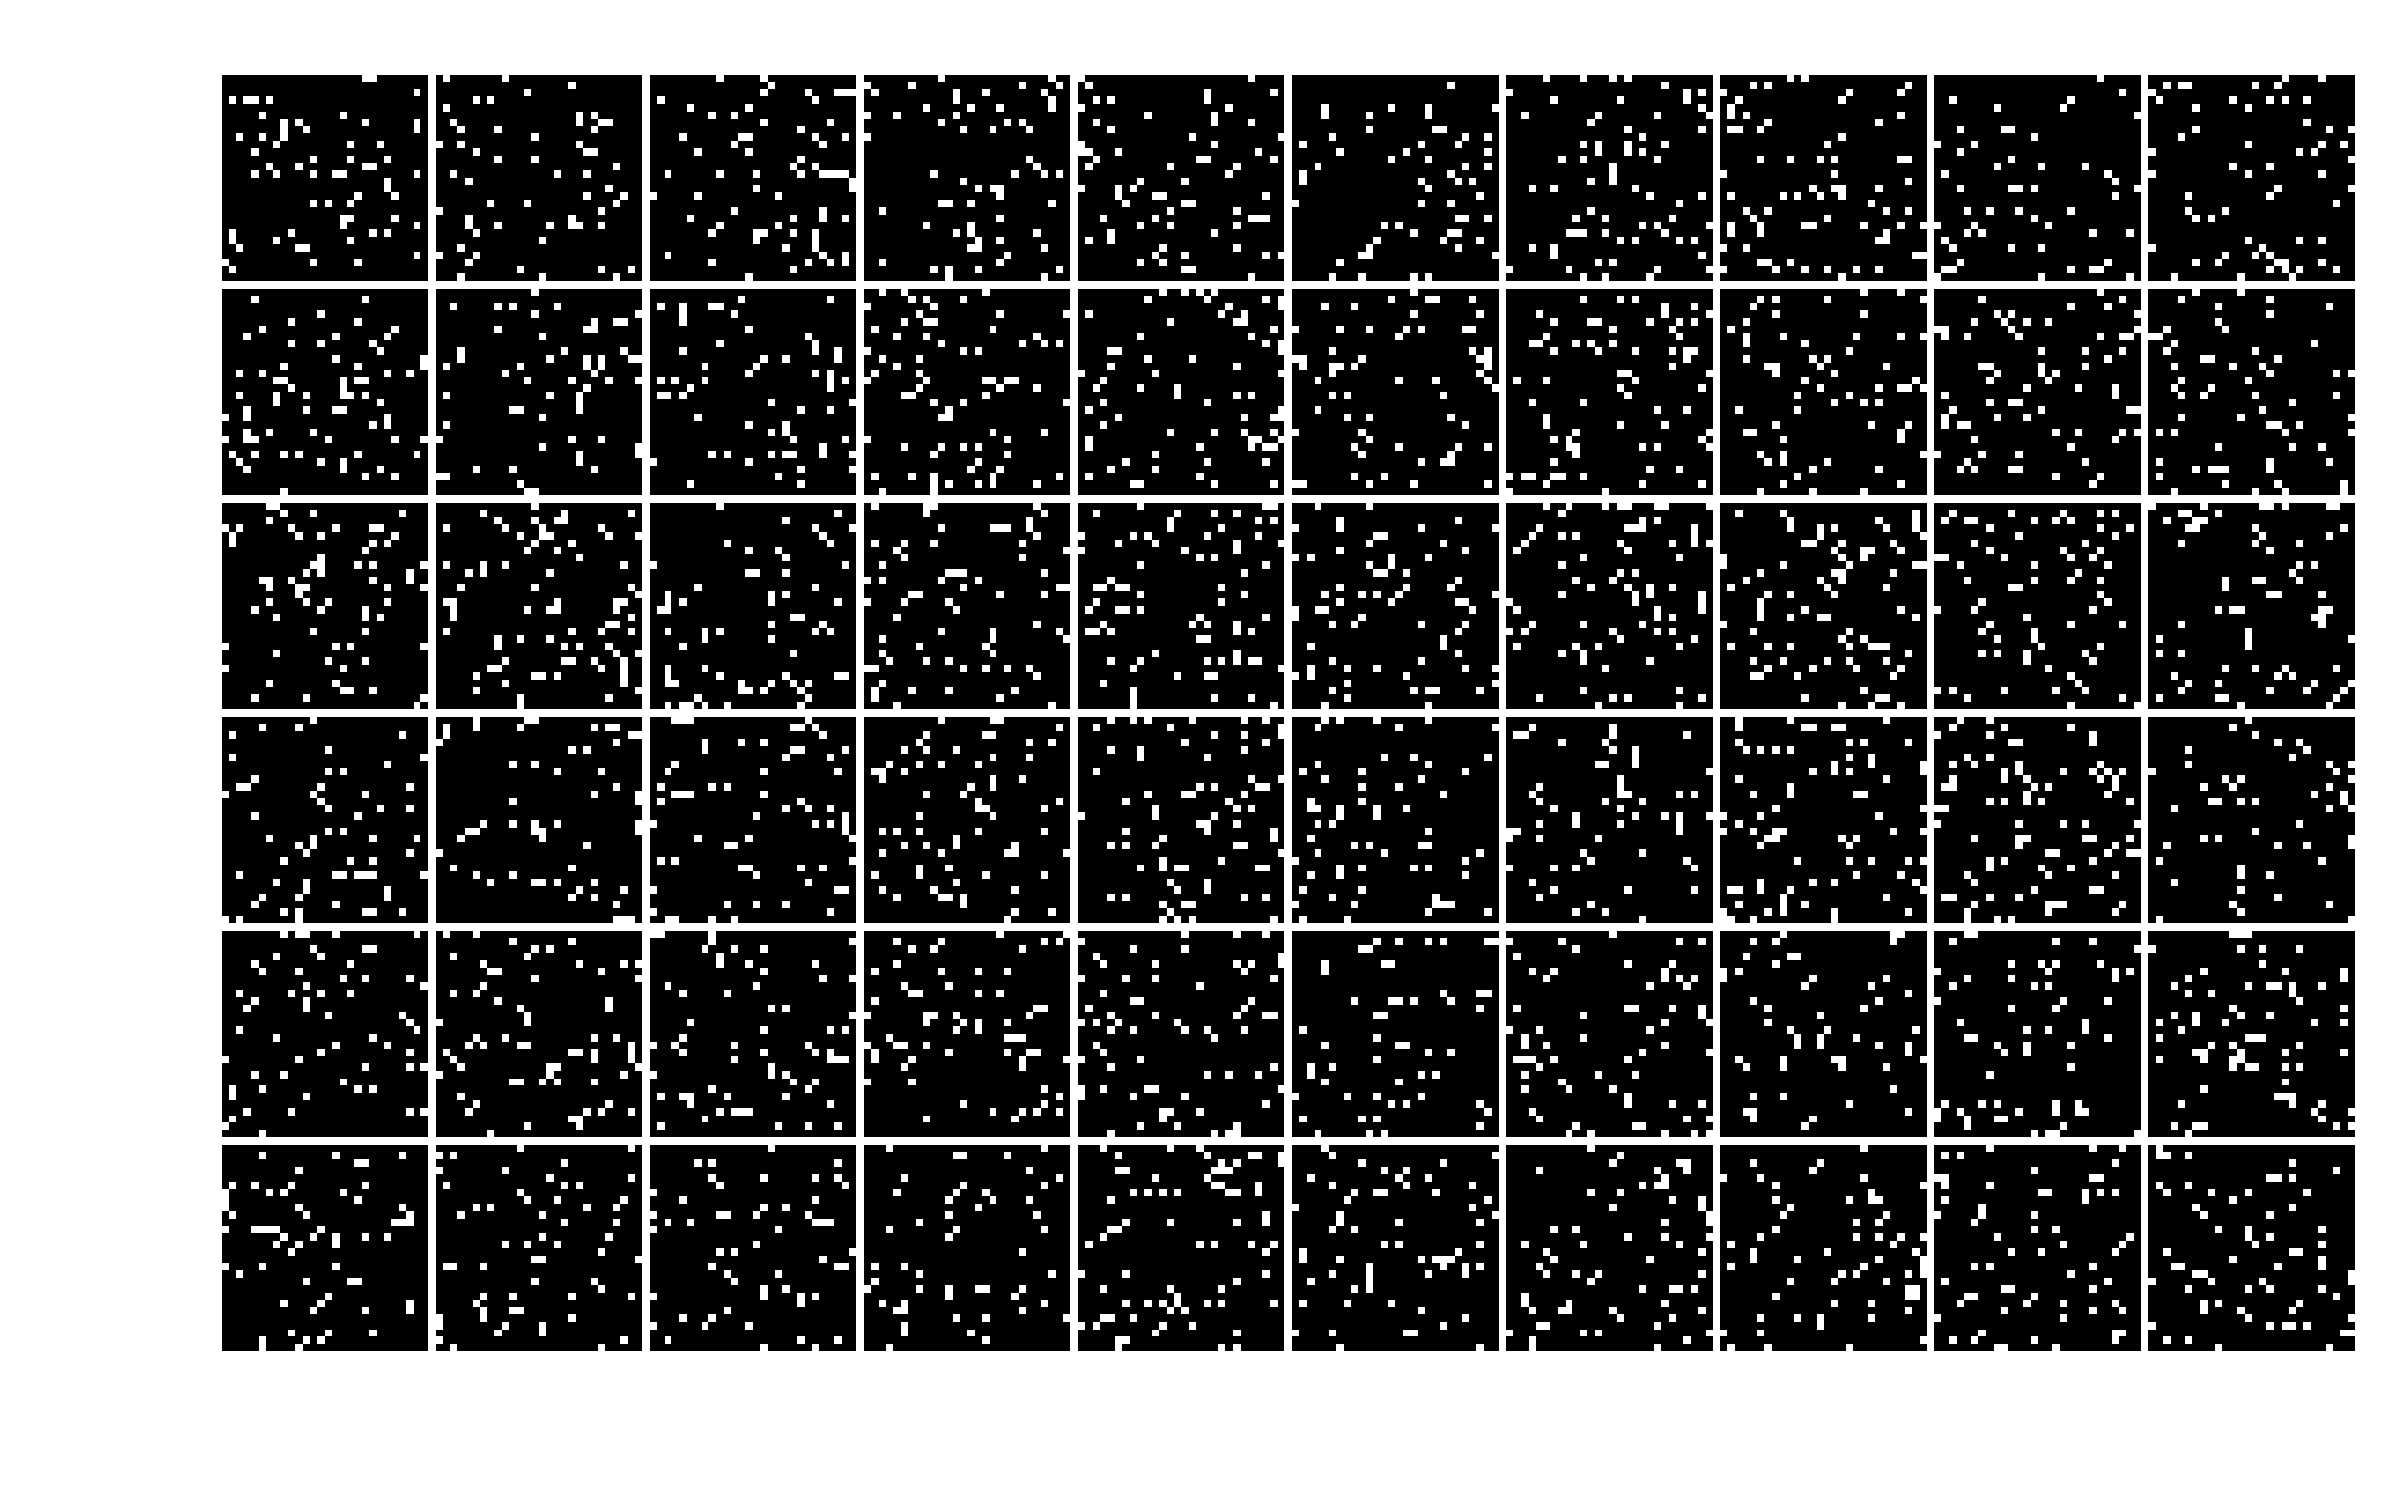

In [27]:
width = height = 28
img = np.ones ([1+K*(height+1), 1+C * (width+1),3])
for c in range(C):
    for k in range (K):
        idx1 = k*(height+1)+1
        idx2 = c*(width+1)+1
        img[idx1:idx1+height, idx2:idx2+width,0] = centers[c*K+k].reshape ([height,width])
        img[idx1:idx1+height, idx2:idx2+width,1] = img[idx1:idx1+height, idx2:idx2+width,0]
        img[idx1:idx1+height, idx2:idx2+width,2] = img[idx1:idx1+height, idx2:idx2+width,0]
plt.axis('off')
plt.imshow (img)
plt.show()

In [28]:
maxEpoch = 10
XTrain = centers
(N, dim) = XTrain.shape
W = np.random.rand (dim, dim)
W = (W + W.T) / 2
b = np.zeros (dim)
for epoch in range (maxEpoch):
    for n in range (N):
        x = XTrain[n,:]
        z = W @ x + b
        y = np.sign (z)
        t = x
        deltaW = np.outer ((t - y) / 2 , x.T)
        deltaW = (deltaW + deltaW.T) / 2
        W = W + deltaW
        b = b + (t - y) / 2
for d in range (dim):
    W[d,d] = 0

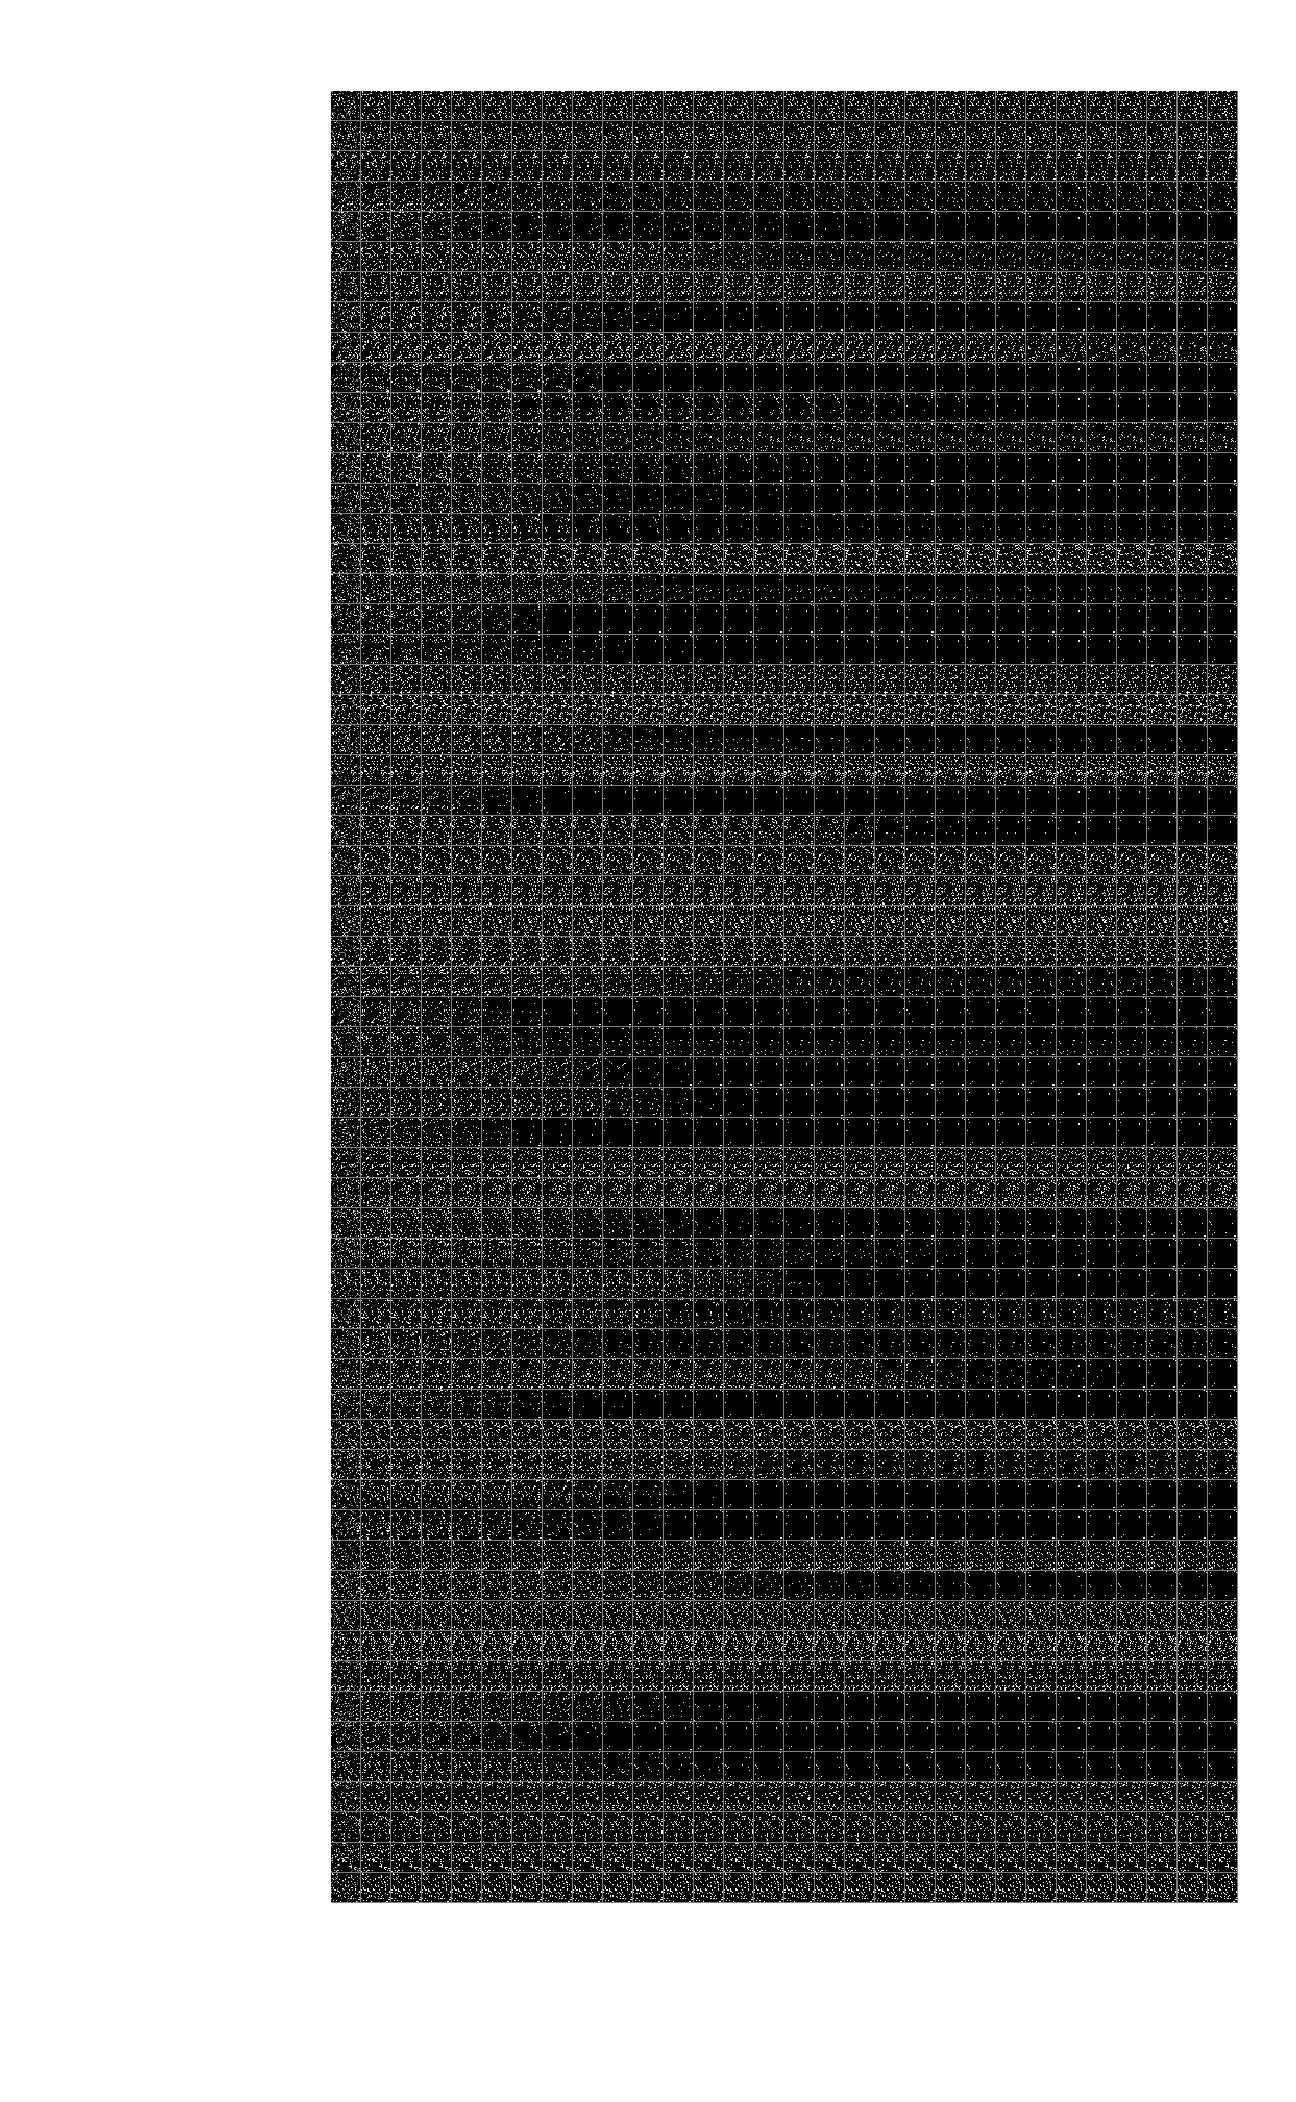

In [29]:
maxHopfieldIter = 30
img = np.zeros ([29 * N,29 * maxHopfieldIter])
for n in range (N):
    x = XTrain[n,:]
    for i in range (maxHopfieldIter):
        img[n*29:n*29+28,i*29:i*29+28] = np.reshape(x,[28,28])
        z = W @ x + b
        y = np.sign(z)
        x = y
plt.axis('off')        
plt.imshow (img,cmap='gray')
plt.imsave ('hopfield_gardner_random.png', img,cmap='gray')
plt.show()